In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

ModuleNotFoundError: No module named 'seaborn'

In [2]:
train_df = pd.read_csv(r'train.csv')

In [3]:
train_df.head(15)

,id,label,text,title,author,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,TRUE,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


In [4]:
train_df = train_df.drop("author", axis = 1)
train_df = train_df.drop("title", axis = 1)
train_df = train_df.drop("id", axis = 1)

In [5]:
train_df.shape

(10240, 11)

In [6]:
train_df.head(15)

,label,text,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,FALSE,Says the Annies List political group supports ...,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,half-true,When did the decline of coal start? It started...,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,FALSE,Health care reform legislation is likely to ma...,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,half-true,The economic turnaround started at the end of ...,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,TRUE,The Chicago Bears have had more starting quart...,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,barely-true,Jim Dunnam has not lived in the district he re...,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,half-true,I'm the only person on this stage who has work...,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,half-true,"However, it took $19.5 million in Oregon Lotte...",NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,mostly-true,Says GOP primary opponents Glenn Grothman and ...,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


<Axes: xlabel='label', ylabel='count'>

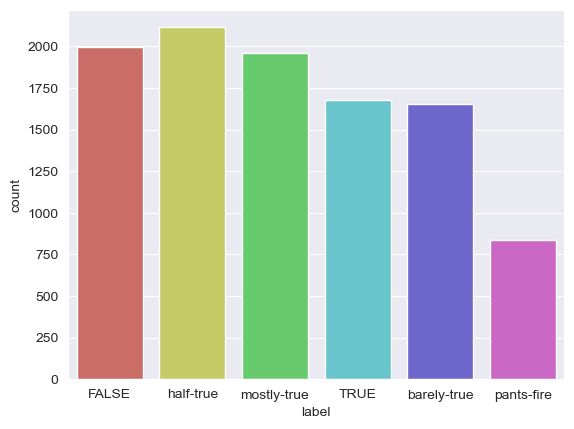

In [7]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

In [8]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        10240 non-null  object 
 1   text         10240 non-null  object 
 2   Unnamed: 5   7342 non-null   object 
 3   Unnamed: 6   8030 non-null   object 
 4   Unnamed: 7   10238 non-null  object 
 5   Unnamed: 8   10238 non-null  float64
 6   Unnamed: 9   10238 non-null  float64
 7   Unnamed: 10  10238 non-null  float64
 8   Unnamed: 11  10238 non-null  float64
 9   Unnamed: 12  10238 non-null  float64
 10  Unnamed: 13  10138 non-null  object 
dtypes: float64(5), object(6)
memory usage: 880.1+ KB
check finished.


In [9]:
train_df = train_df.dropna()

In [10]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Index: 6721 entries, 0 to 10239
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        6721 non-null   object 
 1   text         6721 non-null   object 
 2   Unnamed: 5   6721 non-null   object 
 3   Unnamed: 6   6721 non-null   object 
 4   Unnamed: 7   6721 non-null   object 
 5   Unnamed: 8   6721 non-null   float64
 6   Unnamed: 9   6721 non-null   float64
 7   Unnamed: 10  6721 non-null   float64
 8   Unnamed: 11  6721 non-null   float64
 9   Unnamed: 12  6721 non-null   float64
 10  Unnamed: 13  6721 non-null   object 
dtypes: float64(5), object(6)
memory usage: 630.1+ KB
check finished.


In [11]:
train_df.shape

(6721, 11)

In [12]:
train_df.head(10)

,label,text,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,FALSE,Says the Annies List political group supports ...,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,half-true,When did the decline of coal start? It started...,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
5,TRUE,The Chicago Bears have had more starting quart...,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
7,half-true,I'm the only person on this stage who has work...,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
9,mostly-true,Says GOP primary opponents Glenn Grothman and ...,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video
10,mostly-true,"For the first time in history, the share of th...",U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,a speech
11,half-true,"Since 2000, nearly 12 million Americans have s...",U.S. Senator,Vermont,independent,18.0,12.0,22.0,41.0,0.0,a tweet
12,FALSE,When Mitt Romney was governor of Massachusetts...,Former governor,Massachusetts,republican,34.0,32.0,58.0,33.0,19.0,an interview with CBN News
14,barely-true,Most of the (Affordable Care Act) has already ...,Columnist,Maryland,columnist,7.0,6.0,3.0,5.0,1.0,"comments on ""Fox News Sunday"""


In [13]:
train_df.reset_index(drop= True,inplace=True)

In [14]:
train_df.head(10)

,label,text,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,FALSE,Says the Annies List political group supports ...,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,half-true,When did the decline of coal start? It started...,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,TRUE,The Chicago Bears have had more starting quart...,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
4,half-true,I'm the only person on this stage who has work...,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
5,mostly-true,Says GOP primary opponents Glenn Grothman and ...,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video
6,mostly-true,"For the first time in history, the share of th...",U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,a speech
7,half-true,"Since 2000, nearly 12 million Americans have s...",U.S. Senator,Vermont,independent,18.0,12.0,22.0,41.0,0.0,a tweet
8,FALSE,When Mitt Romney was governor of Massachusetts...,Former governor,Massachusetts,republican,34.0,32.0,58.0,33.0,19.0,an interview with CBN News
9,barely-true,Most of the (Affordable Care Act) has already ...,Columnist,Maryland,columnist,7.0,6.0,3.0,5.0,1.0,"comments on ""Fox News Sunday"""


In [15]:
label_train = train_df.label

In [16]:
label_train.head(10)

0          FALSE
1      half-true
2    mostly-true
3           TRUE
4      half-true
5    mostly-true
6    mostly-true
7      half-true
8          FALSE
9    barely-true
Name: label, dtype: object

In [17]:
train_df = train_df.drop("label", axis = 1)

In [18]:
train_df.head(10)

,text,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Says the Annies List political group supports ...,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,When did the decline of coal start? It started...,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,"Hillary Clinton agrees with John McCain ""by vo...",President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,The Chicago Bears have had more starting quart...,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
4,I'm the only person on this stage who has work...,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
5,Says GOP primary opponents Glenn Grothman and ...,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video
6,"For the first time in history, the share of th...",U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,a speech
7,"Since 2000, nearly 12 million Americans have s...",U.S. Senator,Vermont,independent,18.0,12.0,22.0,41.0,0.0,a tweet
8,When Mitt Romney was governor of Massachusetts...,Former governor,Massachusetts,republican,34.0,32.0,58.0,33.0,19.0,an interview with CBN News
9,Most of the (Affordable Care Act) has already ...,Columnist,Maryland,columnist,7.0,6.0,3.0,5.0,1.0,"comments on ""Fox News Sunday"""


In [19]:
train_df['text'][2188]

'Says at the state level were spending more on tax expenditures than we are on public safety, health care and education combined.'

In [20]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [21]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
for x in range(len(train_df)) :
    corpus = []
    review = train_df['text'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['text'][x] = review
    

C:\Users\maraf\AppData\Local\Temp\ipykernel_3988\629356607.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'][x] = review
C:\Users\maraf\AppData\Local\Temp\ipykernel_3988\629356607.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'][x] = review
C:\Users\maraf\AppData\Local\Temp\ipykernel_3988\629356607.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'][x] = review
C:\Users\maraf\A

In [ ]:
train_df['text'][2182]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.3, random_state=1)

In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
Y_train

In [ ]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [ ]:
tfidf_X_train.shape

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

In [ ]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [ ]:
pickle.dump(classifier,open('./model.pkl', 'wb'))

In [2]:
import pickle
# load the model from disk
loaded_model = pickle.load(open('./model.pkl', 'rb'))

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PassiveAggressiveClassifier from version 0.23.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 0:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
fake_news_det('The world is going to end tomorrow')

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Hp/nltk_data'
    - 'c:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'c:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'c:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\Hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
